In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd


data=pd.read_csv("/content/drive/MyDrive/Dataset/14OCT.csv", encoding='utf-8-sig')
data.head()

Mounted at /content/drive


,No.,Time,Source,Destination,Length,Info,Transmission Rate (per 1000 ms),Reception Rate (per 1000 ms),TR / RR,Sources Count Per Sec,Destinations Count Per Sec,Trans Total Duration Per Sec,Rcv Total Duration Per Sec,Trans Average Per Sec,Rcv Average Per Sec,DAO,DIS,DIO,Label
0,1,0.000000,6,9999,64,2,0.038,0.35,0.108571,38,350,0.10409,0.979491,0.002739,0.002799,0,38,0,0
1,2,0.003289,6,9999,64,2,0.038,0.35,0.108571,38,350,0.10409,0.979491,0.002739,0.002799,0,38,0,0
2,3,0.006556,6,9999,64,2,0.038,0.35,0.108571,38,350,0.10409,0.979491,0.002739,0.002799,0,38,0,0
3,4,0.009841,6,9999,64,2,0.038,0.35,0.108571,38,350,0.10409,0.979491,0.002739,0.002799,0,38,0,0
4,5,0.013110,6,9999,64,2,0.038,0.35,0.108571,38,350,0.10409,0.979491,0.002739,0.002799,0,38,0,0


In [ ]:
print(data.groupby('Label').size())
data.columns

Label
0    43860
1    74285
2    43327
dtype: int64


Index(['No.', 'Time', 'Source', 'Destination', 'Length', 'Info',
       'Transmission Rate (per 1000 ms)', 'Reception Rate (per 1000 ms)',
       'TR / RR', 'Sources Count Per Sec', 'Destinations Count Per Sec',
       'Trans Total Duration Per Sec', 'Rcv Total Duration Per Sec',
       'Trans Average Per Sec', 'Rcv Average Per Sec', 'DAO', 'DIS', 'DIO',
       'Label'],
      dtype='object')

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where

data = data.drop( ['No.','Source', 'Destination', 'Time','Length', 'Sources Count Per Sec', 'Destinations Count Per Sec'],axis = 1)

X = data.iloc[:, :-1]
y= data.iloc[: , -1]
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
print(len(X),len(y))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Counter({1: 74285, 0: 43860, 2: 43327})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 43327, 1: 43327, 2: 43327})
129981 129981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(data.columns))
counter = Counter(y)
print(counter)
print(len(X),len(y))


12
Counter({0: 43327, 1: 43327, 2: 43327})
129981 129981


In [ ]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)
print(len(X_train))

103984


In [ ]:
from sklearn import preprocessing
X_train= preprocessing.normalize(X_train)
X= preprocessing.normalize(X)

In [ ]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(X_train, y_train)

In [ ]:
from sklearn.externals import joblib
linear_svm = joblib.dump(linear,'linear_svm.pkl')
rbf_svm = joblib.dump(rbf,'rbf_svm.pkl')
poly_svm= joblib.dump(poly,'poly_svm.pkl')
sig_svm= joblib.dump(sig,'sig_svm.pkl')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
linear1= joblib.load('linear_svm.pkl')
accuracy_lin = linear1.score(X_test, y_test)

poly1= joblib.load('poly_svm.pkl')
accuracy_poly = poly1.score(X_test, y_test)

rbf1= joblib.load('rbf_svm.pkl')
accuracy_rbf = rbf1.score(X_test, y_test)

sig1= joblib.load('sig_svm.pkl')
accuracy_sig = sig1.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.33830826633842365
Accuracy Polynomial Kernel: 0.6647305458322114
Accuracy Radial Basis Kernel: 0.3307689348771012
Accuracy Sigmoid Kernel: 0.6256491133592338


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
history= KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
accuracy = history.score(X_test, y_test)
print("Accuracy of KNN Classifier for 5 Nearest Neighbours: ",accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Accuracy of KNN Classifier for 5 Nearest Neighbours:  0.9994230103473478


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


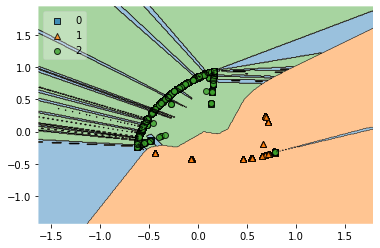

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = knn
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
#plot_decision_regions(X_train2, y_train, clf=clf, legend=3)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)



Accuracy of Decision Trees:  0.3351925222141016


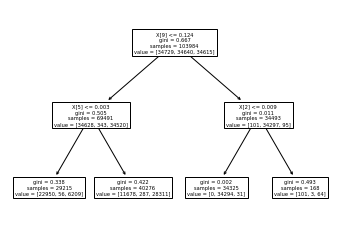

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
print("Accuracy of Decision Trees: ",dtree_model.score(X_test,y_test))
#DT= joblib.dump(dtree_model,'Decision_Tree.pkl')
import sklearn.tree
sklearn.tree.plot_tree(dtree_model);

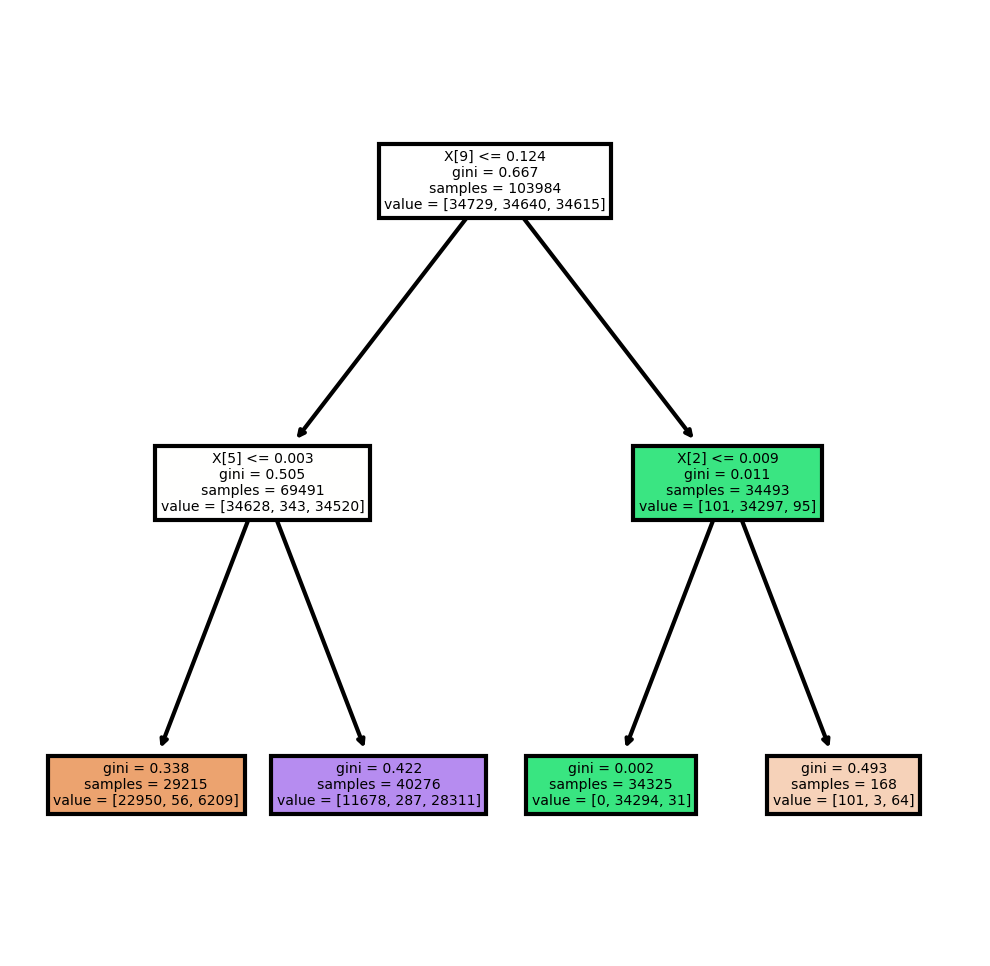

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
sklearn.tree.plot_tree(dtree_model,filled = True)
fig.savefig('imagename.png')

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
accuracy = gnb.score(X_test, y_test)
print("Accuracy for Naive-Bayes Classifier: ",accuracy)
joblib.dump(gnb,'Naive-Bayes.pkl')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(solver='liblinear')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

joblib.dump(eclf,'Ensemble.pkl')

In [ ]:
data.columns

Index(['Info', 'Transmission Rate (per 1000 ms)',
       'Reception Rate (per 1000 ms)', 'TR / RR',
       'Trans Total Duration Per Sec', 'Rcv Total Duration Per Sec',
       'Trans Average Per Sec', 'Rcv Average Per Sec', 'DAO', 'DIS', 'DIO',
       'Label'],
      dtype='object')